#Importing required Libraries

In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdown
import scipy.stats

We read the required csv files, which contain the required data, to Pandas DataFrames so that we can play with the data using pandas.

We use gdown to download the required csv files from directly from Google drive.

In [524]:
search_times_df=pd.read_csv(gdown.download(f"https://drive.google.com/uc?id=1RuDIr5Xipr-Me67nwYTZQ3L1zz2_3Dbu","search-times-dataset.csv",quiet=False))
firing_rates_df=pd.read_csv(gdown.download(f"https://drive.google.com/uc?id=1Vf6iQfEGKIQjgMT2nGPbEcTF9Kq7Mit3","firing-rates-dataset.csv",quiet=False))

Downloading...
From: https://drive.google.com/uc?id=1RuDIr5Xipr-Me67nwYTZQ3L1zz2_3Dbu
To: /content/search-times-dataset.csv
100%|██████████| 5.98k/5.98k [00:00<00:00, 8.36MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Vf6iQfEGKIQjgMT2nGPbEcTF9Kq7Mit3
To: /content/firing-rates-dataset.csv
100%|██████████| 23.5k/23.5k [00:00<00:00, 44.7MB/s]


# Question 1

### (A) $\quad$ Computation of average search delays

The csv files taken into new data frames may have numbers as strings so, we first convert them to int data type by using `pd.to_numeric` function. That alows us to do arthematics on them.

In [525]:
search_times_n_df = search_times_df.iloc[2:].apply(pd.to_numeric, errors='coerce')  # Convert all columns to numbersif they are strings previously
firing_rates_n_df = firing_rates_df.iloc[2:].apply(pd.to_numeric, errors='coerce')

In [526]:
no_col=(len(search_times_n_df.columns))
search_times_n_df.head()  #just checking

,Set 1,Set 1.1,Set 1.2,Set 1.3,Set 1.4,Set 1.5,Set 2,Set 2.1,Set 2.2,Set 2.3,Set 2.4,Set 2.5,Set 3,Set 3.1,Set 3.2,Set 3.3,Set 3.4,Set 3.5
2,375,5025,771,1319,485,501,607,826,767,602,545,710,1257,655,547,494,499,495
3,1425,1146,1490,1149,554,655,653,1210,546,766,490,548,880,719,655,820,605,497
4,2088,1540,1532,1431,820,932,707,710,545,879,431,435,981,550,658,710,438,495
5,875,1422,994,542,875,1263,600,1260,765,1434,607,655,1046,600,601,988,1100,662
6,1373,1646,1590,1160,490,658,875,715,1651,820,600,710,1536,1211,600,1147,714,825


Substracting the so-called "base line reaction time" i.e $328ms$ from all the data values to get the reaction time of brain eliminating the factor of movement of hand to press the buzzer.

In [527]:
search_times_n_df=(search_times_n_df)-328

In [528]:
search_times_n_df.head() # For checking purpose

,Set 1,Set 1.1,Set 1.2,Set 1.3,Set 1.4,Set 1.5,Set 2,Set 2.1,Set 2.2,Set 2.3,Set 2.4,Set 2.5,Set 3,Set 3.1,Set 3.2,Set 3.3,Set 3.4,Set 3.5
2,47,4697,443,991,157,173,279,498,439,274,217,382,929,327,219,166,171,167
3,1097,818,1162,821,226,327,325,882,218,438,162,220,552,391,327,492,277,169
4,1760,1212,1204,1103,492,604,379,382,217,551,103,107,653,222,330,382,110,167
5,547,1094,666,214,547,935,272,932,437,1106,279,327,718,272,273,660,772,334
6,1045,1318,1262,832,162,330,547,387,1323,492,272,382,1208,883,272,819,386,497


We create a array (say `average_search_delays`) to store the mean search time delay of each column by using `.mean()` function.



In [529]:
average_search_delays=np.array([0]*no_col, dtype=float)
for i in range(0 , no_col , 1):
  average_search_delays[i]=(search_times_n_df.iloc[:,i]).mean()

In [530]:
average_search_delays

array([ 883.77777778, 1081.40277778,  985.25      , 1009.13888889,
        275.26388889,  296.66666667,  503.31944444,  502.79166667,
        313.40277778,  307.52777778,  218.55555556,  251.95833333,
        818.33333333,  615.23611111,  309.40277778,  341.93055556,
        239.84722222,  209.38888889])

###(B) Computiation of relative distance per neuron

 Given an oddball image $i$ with firing rates $\lambda_i=[\lambda_i(1) \ldots \lambda_i(N)]^T$ and a distracter image $j$ with firing rates $\lambda_j=[\lambda_j(1) \ldots \lambda_j(N)]^T$ , where $N$ is the number of neurons from which the firing rates are recorded. The
 relative entropy distance per neuron for particular pair of images $i$ and $j$ is defined as
 $$D_{ij}=\frac{1}{N}\sum_{n=1}^{N}\left[\lambda_i(n)\log\frac{\lambda_i(n)}{\lambda_j(n)}-\lambda_i(n)+\lambda_j(n)\right]$$
 To find the above summation we find the value of $$K=\lambda_i(n)\log\frac{\lambda_i(n)}{\lambda_j(n)}-\lambda_i(n)+\lambda_j(n)$$ for each neuron($n$) then find their mean of that particular column which is nothing but $D_{ij}$.
 We create a new DataFrame `K_df` in which we store the value of $K$ obtained for each entry in the `search_times_delay_n_df` by applying the above formula.

In [531]:
K_df=pd.DataFrame()

Now we iterate along the columns of the `search_times_delay_n_df` Dataframe. We then take the entries of left column and right column into `pd.series` variables say `a1,b1` and `a2,b2`. From these variables we replace $0$s from our data with `np.nan` due to the below reason. After that we store the obtained $K$ values to the formed DataFrame.

ISSUE:

There is a issue if any entry is $0$ in the `search_times_delay_n_df` because when we appy logarithm to that particular entry we get a undefined behaviour. So, we replace that $0$ by `np.nan` so that this entry will not be included in the computation of  entries in `K_df` i.e, those entries corresponding to the $0$ entries will be `nan` in `K_df` also.

In [532]:
for L_col in range(0 , no_col, 2 ):
  a1, b1 = firing_rates_n_df.iloc[:,L_col], firing_rates_n_df.iloc[:,L_col+1]
  a2, b2 = firing_rates_n_df.iloc[:,L_col+1], firing_rates_n_df.iloc[:,L_col]

  a1_best = np.where((a1 == 0) | (b1 == 0), np.nan, a1)
  b1_best = np.where((a1 == 0) | (b1 == 0), np.nan, b1)

  a2_best = b1_best
  b2_best = a1_best

  K1 = a1_best * np.log(a1_best / b1_best) - a1 + b1
  K2 = a2_best * np.log(a2_best / b2_best) - a2 + b2

  K_df[L_col] = K1
  K_df[L_col+1] = K2

K_df=pd.DataFrame(K_df)
K_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
2,0.173225,0.166289,0.435781,0.415485,2.312540,2.639682,3.756476,4.830628,14.363954,24.877079,16.429179,30.461137,5.265543,6.369080,11.528018,15.527215,5.202929,6.396599
3,6.105883,4.711486,3.063883,2.609783,1.173780,1.320530,0.604935,0.646094,8.355519,11.221346,6.448344,8.266393,0.305385,0.291678,0.429703,0.462871,0.107212,0.111186
4,0.888340,1.144034,0.042591,0.040851,0.108800,0.113752,0.233967,0.221034,0.626800,0.688505,0.758474,0.850781,0.301740,0.284562,0.171539,0.180381,0.444290,0.487660
5,1.308731,1.417961,0.232289,0.224273,0.305716,0.317865,0.212225,0.224120,0.032616,0.031922,0.061098,0.063023,3.606877,3.003094,2.848093,3.423606,0.333861,0.353540
6,0.329409,0.350403,2.262347,1.956450,1.296626,1.470199,0.116948,0.111721,2.785195,3.451139,0.091975,0.095488,0.126046,0.122195,1.367199,1.535356,2.570647,2.986575


Now since we have all the $K$ values in the DataFrame `K_df` we can find $D_{ij}$ by finding the means of each column and store it in a array.

In [533]:
relative_entropy_distances=K_df.mean().values
relative_entropy_distances

array([0.63834794, 0.61835705, 0.65685051, 0.66293651, 1.55337325,
       1.63076479, 1.11677337, 1.09011194, 1.46193832, 1.56548597,
       1.77473095, 2.12783769, 0.65428099, 0.78416525, 1.13060613,
       1.47729041, 1.64344117, 1.72498623])

### (C)$\quad$ Computation of $l1$ distance per neuron
We need to compute the value of $l1$ distance per neuron say $L_{ij}$
$$L_{ij}=\frac{1}{N}\sum_{n=1}^N\left|\lambda_i-\lambda_j \right|$$
For that we need to find the value of $$K_= \left|\lambda_i-\lambda_j\right|$$ for each pair of firing rates of a neuron and then average them to et $L_{ij}$

In [534]:
K__df=pd.DataFrame()

In [535]:
for L_col in range(0 , no_col, 2 ):
  a_1, b_1 = firing_rates_n_df.iloc[:,L_col], firing_rates_n_df.iloc[:,L_col+1]
  a_2, b_2 = firing_rates_n_df.iloc[:,L_col+1], firing_rates_n_df.iloc[:,L_col]

  K_1 = abs(a_1-b_1)
  K_2 = abs(a_2-b_2)

  K__df[L_col] = K_1
  K__df[L_col+1] = K_2

K__df=pd.DataFrame(K__df)
K__df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
2,2.769231,2.769231,5.948718,5.948718,12.461538,12.461538,11.333333,11.333333,23.333333,23.333333,24.666667,24.666667,20.333333,20.333333,30.102564,30.102564,18.666667,18.666667
3,13.846154,13.846154,11.769231,11.769231,7.051282,7.051282,6.333333,6.333333,22.000000,22.000000,19.666667,19.666667,4.333333,4.333333,4.000000,4.000000,2.000000,2.000000
4,2.666667,2.666667,0.666667,0.666667,1.666667,1.666667,2.666667,2.666667,4.666667,4.666667,4.666667,4.666667,3.333333,3.333333,2.333333,2.333333,3.333333,3.333333
5,11.333333,11.333333,4.333333,4.333333,5.333333,5.333333,2.666667,2.666667,1.000000,1.000000,1.333333,1.333333,12.000000,12.000000,11.333333,11.333333,4.000000,4.000000
6,3.666667,3.666667,9.666667,9.666667,7.333333,7.333333,1.666667,1.666667,9.666667,9.666667,1.666667,1.666667,2.666667,2.666667,8.333333,8.333333,12.333333,12.333333


Now finally computing $L_{ij}$ by finding mean and then store the obtained mean of each column in a array ```L_1_distances```

In [536]:
L_1_distances=K__df.mean().values
L_1_distances

array([2.7756785 , 2.7756785 , 3.20633068, 3.20633068, 4.79391394,
       4.79391394, 3.79158273, 3.79158273, 4.13455124, 4.13455124,
       4.72969894, 4.72969894, 3.11108657, 3.11108657, 3.94509803,
       3.94509803, 5.45929509, 5.45929509])

# Question 2

### Fitting a straight line passing through origin


In this section of the given Problem statement we find a best fit straight line plassing through the origin in the coordinate system where $x-axis$ represents relative entropy distances for the first part of the question and L1 distances for the second part of question where as inverse of average search delays on $y-axis$.

The line we get should be the best possible line which is very close to points

(x-cord, value of inverse of average search delays).


To find the best fitting line passing through orgin for the above points we do **The Method of least squares**.
Let the required line be $$y=mx$$

We minimize the cost function which is nothing but sum of distances between the points and the line  , can bee written as
$$C=\sum_{i=1}^n(y_i-(mx_i))^2$$

Where n is the number of points we have as data.

For the cost function to be minimum we have $$m=\frac{\sum xy}{\sum x^2}$$
So we compute the value of $m$ by applying the value of points we have. Before that we first bring our the $x-coordinates$ and $y-coordinates$ of the data we have into seperate arrays so that we can easily plot them and also use for the computation of slope.

In [537]:
inverse_avg_search_delays=1/average_search_delays
inverse_avg_search_delays

array([0.00113151, 0.00092472, 0.00101497, 0.00099094, 0.00363288,
       0.00337079, 0.00198681, 0.0019889 , 0.00319078, 0.00325174,
       0.0045755 , 0.00396891, 0.001222  , 0.00162539, 0.00323203,
       0.00292457, 0.00416932, 0.0047758 ])

In [538]:
x_cord_entropy=relative_entropy_distances
x_cord_L1=L_1_distances
y_cord_inv_search_delays=inverse_avg_search_delays

In [539]:
y_cord_inv_search_delays

array([0.00113151, 0.00092472, 0.00101497, 0.00099094, 0.00363288,
       0.00337079, 0.00198681, 0.0019889 , 0.00319078, 0.00325174,
       0.0045755 , 0.00396891, 0.001222  , 0.00162539, 0.00323203,
       0.00292457, 0.00416932, 0.0047758 ])

###(A) Computing slope for best fit line in the graph of Relative Entropy Distances in X-axis and Inverse of Average Search Delays on Y-axis and plotting

We can compute the value of Slope as following:

In [540]:
m_entropy = np.sum(x_cord_entropy * y_cord_inv_search_delays) / np.sum(x_cord_entropy**2)
m_entropy

0.002201685956532322

Since we have the equation of the line and the data points we plot them using mathplot library.

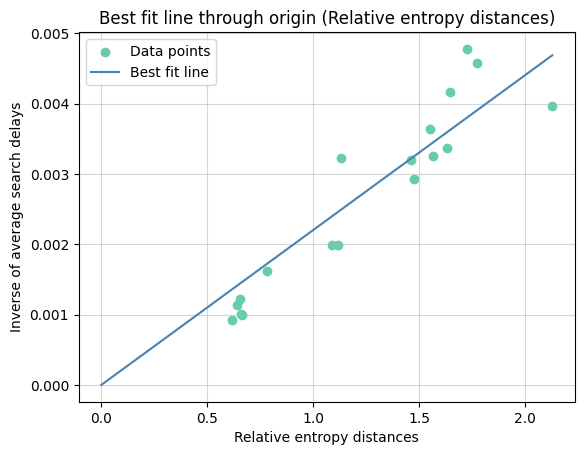

In [541]:
x_fit=np.linspace(0,max(x_cord_entropy),100)
y_fit=x_fit*m_entropy
plt.scatter(x_cord_entropy,y_cord_inv_search_delays,color='mediumaquamarine',label='Data points')
plt.plot(x_fit,y_fit,color='steelblue',label='Best fit line')
plt.xlabel("Relative entropy distances")
plt.ylabel("Inverse of average search delays")
plt.title("Best fit line through origin (Relative entropy distances)")
plt.grid(True, linestyle='-', alpha=0.5)
plt.legend()


plt.show()

### (B) Computing slope for best fit line in the graph of Relative Entropy Distances in X-axis and Inverse of Average Search Delays on Y-axis and plotting

We compute the value of slope as following:

In [542]:
m_L1 = np.sum(x_cord_L1 * y_cord_inv_search_delays) / np.sum(x_cord_L1**2)
m_L1

0.0007000776902229355

Since we have the equation of the line and the points we can now plot them using mathplot library.

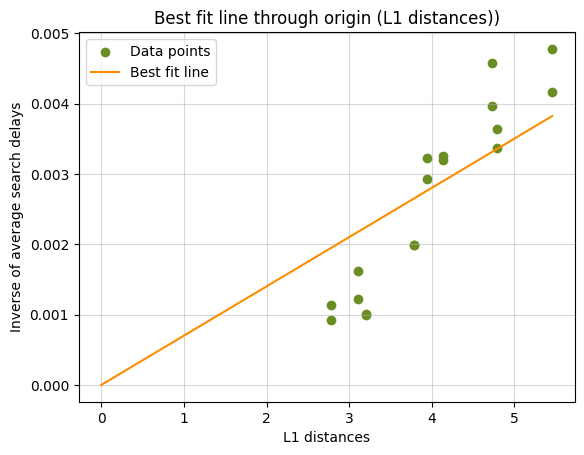

In [543]:
x_fit=np.linspace(0,max(x_cord_L1),100)
y_fit=x_fit*m_L1
plt.scatter(x_cord_L1,y_cord_inv_search_delays,color='olivedrab',label='Data points')
plt.plot(x_fit,y_fit,color='darkorange',label='Best fit line')
plt.xlabel("L1 distances")
plt.ylabel("Inverse of average search delays")
plt.title("Best fit line through origin (L1 distances))")
plt.grid(True, linestyle='-', alpha=0.5)
plt.legend()
plt.show()

### See which one better fit

To see if relative entorpy distances is more accurate or L1 distances is more accurate, we will calculate the cost function value i.e $C$ which is discussed earlier.
If $C$ value is more then that means it is less accurate fitting.

In [544]:
C_entropy=np.sum((y_cord_inv_search_delays-(m_entropy*x_cord_entropy))**2)
C_L1=np.sum((y_cord_inv_search_delays-(m_L1*x_cord_L1))**2)

Having found the cost values of both methods we can now check which one is small to gett  the best method.

In [545]:
if C_L1> C_entropy:
  print("The Relative entropy distances method will give better fit")
else:
  print(f"The l1 distances method will give a better fit")

The Relative entropy distances method will give better fit


#Question 3

## Fitting a Gamma distribution to the search delays


###(A)Taking half of the colunms and Estimating the shape parameter

We are given that a Gamma function is denoted as $G(a,b)$ where $a$ is the shape parameter and $b$ is rate paramete. We are also given that the mean ($\mu$) of a gamma function is equal to $\frac{a}{b}$ and Standard Deviation ($\sigma$) of gamma funciton is $\frac{\sqrt{a}}{b}$.

We first select half columns which we use to estimate the value $a$. We store the entries of the selected columns in a DataFrame to perform further computations. Apart from storing the selected columns in a DataFrame we also store the unselected columns in other DataFrame which is required in next part of the question.

In [546]:
# This is just to get same output every time I use it so that I will have a clarity if you don't want to have a particular seed put None in place of seed value
np.random.seed(5)
# replace set to be False so that I can select exactly 9 unique columns reather than haveing repeatation
selected_cols=np.random.choice(search_times_n_df.columns,size=9, replace=False)
 # For further use in question
unselected_cols=[col for col in search_times_n_df.columns if col not in selected_cols]
#Creating a df so that I can store only required rows
selected_search_time_n_df=search_times_n_df[selected_cols]
# Creating a df for unselected columns so that it can be used further
unselected_search_time_n_df=search_times_n_df[unselected_cols]
selected_search_time_n_df.head()

,Set 1.5,Set 1.1,Set 2.4,Set 1.2,Set 2.5,Set 3.5,Set 3,Set 2.1,Set 1.4
2,173,4697,217,443,382,167,929,498,157
3,327,818,162,1162,220,169,552,882,226
4,604,1212,103,1204,107,167,653,382,492
5,935,1094,279,666,327,334,718,932,547
6,330,1318,272,1262,382,497,1208,387,162


Now as we have a seperated the selected colums into a DataFrame we can now simply find the shape parameter as follows:

1.  We store all means of each column in a array and all std deviations of each column in another array.


In [547]:
means=selected_search_time_n_df.mean().values
stdeviations=selected_search_time_n_df.std().values

In [548]:
means #just to verify I am getting 9 elements

array([ 296.66666667, 1081.40277778,  218.55555556,  985.25      ,
        251.95833333,  209.38888889,  818.33333333,  502.79166667,
        275.26388889])

In [549]:
stdeviations #just to verify I am getting 9 elements

array([190.14405214, 744.13842154, 142.38728074, 558.70813641,
       128.21059233, 134.96609439, 452.61163902, 354.28753889,
       188.96210165])

2.  Plotting a graph in which $X-axis$ has means of search delays and $Y-axis$ has standard deviations of search delays to get a estimate.


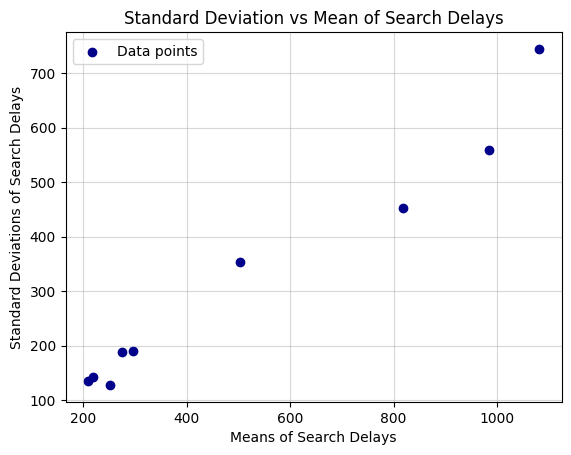

In [550]:
plt.scatter(means,stdeviations,color='darkblue',label='Data points')
plt.xlabel("Means of Search Delays")
plt.ylabel("Standard Deviations of Search Delays")
plt.title("Standard Deviation vs Mean of Search Delays")
plt.grid(True, linestyle='-', alpha=0.5)
plt.legend()
plt.show()

3.   Having a estimate we can now find `estimated_a` from the above plot. We calculate shape parameters for each mean and standard deviation in their corresponding array of `means` and `stdeviations`. For a particular mean and standard deviation we use the formula
$$a=\frac{\mu^2}{\sigma^2}$$
to get the shape parameter for that particular enties. And Finally mean them to get estimated shape parameter say `estimated_a`

In [551]:
shape_parameters=(means**2)/(stdeviations**2)
estimated_a=shape_parameters.mean()
estimated_a

2.631755167534541

###(B) $\quad$In the unselected columns taking half the sample to find estimated rate parameter.

We use a for loop to iterate across the columns of `unselected_search_time_n_df`. In each loop, first seed the random number generator with `seed_num`. Then, we randomly select half the entries in the current column, and store them in `selected_entries_df`, after which we append the unselected entries to `search_delays`. At the end of the loop, we update `seed_num` for the next iteration, for further possible controlled randomness.


In [552]:
selected_entries_df = pd.DataFrame(columns=unselected_search_time_n_df.columns)

search_delays = np.array([], dtype=int)

In this for loop we iterate along columns of `unselected_search_time_n_df`. To select half of the entries randomly from each column in a controlled manner we have generated a `random.seed()` so that we get same random numbers for that column no matter how many times we run it. Further we get the values of the random entires into a DataFrame `selected_entries_df` and also get the array having enselected entries in those coulmns.

We use a _for_ loop to iterate across the columns of `unselected_search_time_n_df`. In each loop, first seed the random number generator with `seed_num`. Then, we randomly select half the entries in the current column, and store them in `selected_entries_df`, after which we append the _unselected_ entries to `search_delays`. At the end of the loop, we update `seed_num` for the next iteration using an already-seeded `random.randint`, for further possible controlled randomness.

In [553]:
seed_num = 10 # Initial seed_num
# Iterate through each column
for col in unselected_search_time_n_df.columns:
    np.random.seed(seed_num)  # Set the seed for reproducibility

    column_values = unselected_search_time_n_df[col].values

    # Randomly select 36 indices
    selected_indices = np.random.choice(len(column_values), size=36, replace=False)

    # Store the selected values in the new DataFrame
    selected_entries_df[col] = column_values[selected_indices]

    # Store the unselected values in search_delays array
    unselected_values = np.delete(column_values, selected_indices)  # Remove selected values
    search_delays = np.append(search_delays, unselected_values)

    # Update the seed for the next iteration
    seed_num+=np.random.randint(1,16)

print(search_delays[:15])
selected_entries_df.head()

[  47 1097 1708 1203 1152 1208  382  767  993  327  383 1702  382  717
  822]


,Set 1,Set 1.3,Set 2,Set 2.2,Set 2.3,Set 3.1,Set 3.2,Set 3.3,Set 3.4
0,278,323,388,107,773,987,326,163,222
1,547,655,438,107,272,272,162,222,58
2,489,557,162,107,383,717,712,274,832
3,273,1823,437,382,274,327,107,163,58
4,1760,269,379,884,329,493,329,269,112


We compute the means and standard deviations of selected entries from each column and store them in a new arrays.

In [554]:
means_selected_entries=selected_entries_df.mean().values
stdeviations_selected_entries=selected_entries_df.std().values

From the above arrays we calculate the estimated rate parameter by averaging all the rate parameters which we get from one mean in `means_selected_entries` and it's corresponding standard deviation in `stdeviations_selected_entries`.

In [555]:
rate_parameters=means_selected_entries/(stdeviations_selected_entries**2)
estimated_b=rate_parameters.mean()
print(estimated_b)

0.005528711015937707


###(C) Plotting empirical cdf, Gamma cdf and computing _KS_ test statistics

Now to find the empirical CDF we first sort the `search_delays` array and store in the same list.

In [556]:
search_delays=np.sort(search_delays)
print(search_delays[:10])

[47 52 52 52 54 57 57 58 59 62]


Having sorted the `search_delays` array we find the empirical CMF by applying the formula $F(x_i)=\frac{rank (x_i)}{N}$.

In [557]:
N=len(search_delays)
F_x = np.arange(1, N + 1) / N
print(F_x[:5])


[0.00308642 0.00617284 0.00925926 0.01234568 0.0154321 ]


By using the estimateed rate parameter and estimated shape parameter which were found earlier we can plot Gamma CMF using a function in Scipy.stats.

In [558]:
G_x = scipy.stats.gamma.cdf(search_delays, estimated_a, scale=1/estimated_b)
print(G_x[:5])

[0.00620335 0.00793633 0.00793633 0.00793633 0.00869636]


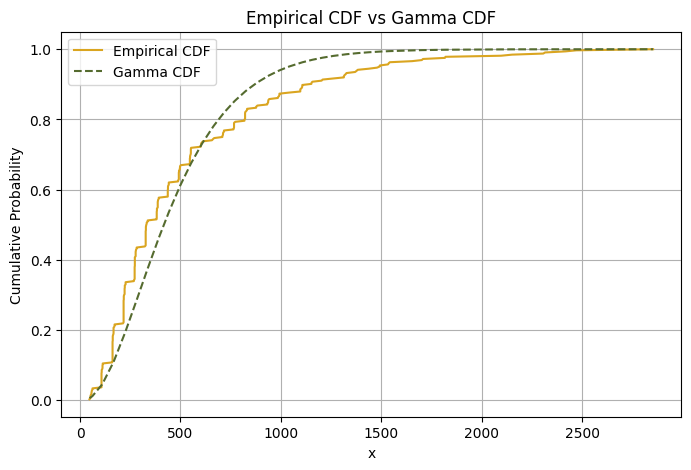

In [559]:
plt.figure(figsize=(8, 5))
plt.plot(search_delays, F_x, label='Empirical CDF', linestyle='-', color='goldenrod')
plt.plot(search_delays, G_x, label='Gamma CDF', linestyle='--', color='darkolivegreen')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF vs Gamma CDF')
plt.legend()
plt.grid()
plt.show()
